<Axes: xlabel='timepoint', ylabel='signal'>

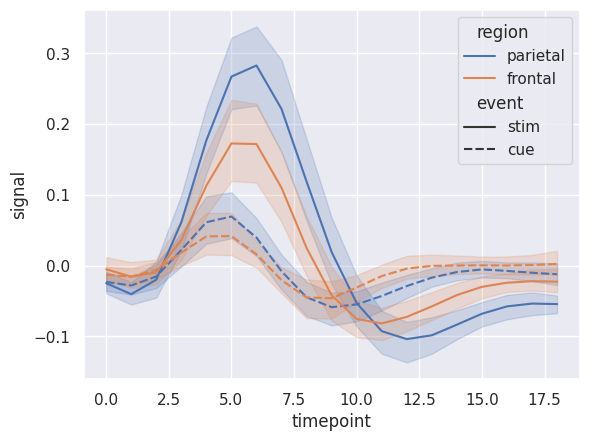

In [1]:
import seaborn as sns
sns.set_theme(style="darkgrid")

# Load an example dataset with long-form data
fmri = sns.load_dataset("fmri")

# Plot the responses for different events and regions
sns.lineplot(x="timepoint", y="signal",
             hue="region", style="event",
             data=fmri)

In [12]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

custom_params = {
    "lines.linewidth": 2.0,
    # "xtick.bottom": True,
    # "ytick.left": True,
    # "xtick.top": True,
    # "ytick.right": True,
 }
sns.set(font_scale=1.5, rc=custom_params)

In [13]:
def read_csv(filepath):
    df = pd.read_csv(filepath)
    df = df.rename(columns={df.columns[0]: "epoch", df.columns[1]: "return"})
    df = df.drop_duplicates(subset="return")
    return df

In [14]:
baselinerun1 = read_csv("data/training/baselinerun1.csv")
baselinerun2 = read_csv("data/training/baselinerun2.csv")
baselinerun3 = read_csv("data/training/baselinerun3.csv")

m1run1 = read_csv("data/training/m1run1.csv")
m1run2 = read_csv("data/training/m1run2.csv")
m1run3 = read_csv("data/training/m1run3.csv")

m2run1 = read_csv("data/training/m2run1.csv")
m2run2 = read_csv("data/training/m2run2.csv")
m2run3 = read_csv("data/training/m2run3.csv")

In [15]:
# df = pd.read_csv("m1run1.csv")
# df = df.rename(columns={df.columns[0]: "epoch", df.columns[4]: "return"})
# df = df.drop_duplicates(subset="return")
# run1 = df.drop(columns=[df.columns[1], df.columns[2], df.columns[3], df.columns[5], df.columns[6]])

# df = pd.read_csv("m1run2.csv")
# df = df.rename(columns={df.columns[0]: "epoch", df.columns[4]: "return"})
# df = df.drop_duplicates(subset="return")
# run2 = df.drop(columns=[df.columns[1], df.columns[2], df.columns[3], df.columns[5], df.columns[6]])

# df = pd.read_csv("m1run3.csv")
# df = df.rename(columns={df.columns[0]: "epoch", df.columns[4]: "return"})
# df = df.drop_duplicates(subset="return")
# run3 = df.drop(columns=[df.columns[1], df.columns[2], df.columns[3], df.columns[5], df.columns[6]])

In [16]:
baseline = pd.concat([baselinerun1, baselinerun2, baselinerun3], keys=["run1", "run2", "run3"])
m1 = pd.concat([m1run1, m1run2, m1run3], keys=["run1", "run2", "run3"])
m2 = pd.concat([m2run1, m2run2, m2run3], keys=["run1", "run2", "run3"])

In [17]:
# sns.lineplot(x="epoch", y="return", data=df4).set_title("method 1 mean episode return")

In [18]:
df5 = pd.concat([baseline, m1, m2], keys=["baseline", "m1", "m2"], names=["method", "run", "row_id"])

In [19]:
df5 = df5.reset_index()
df5 = df5.drop(columns=["row_id"])

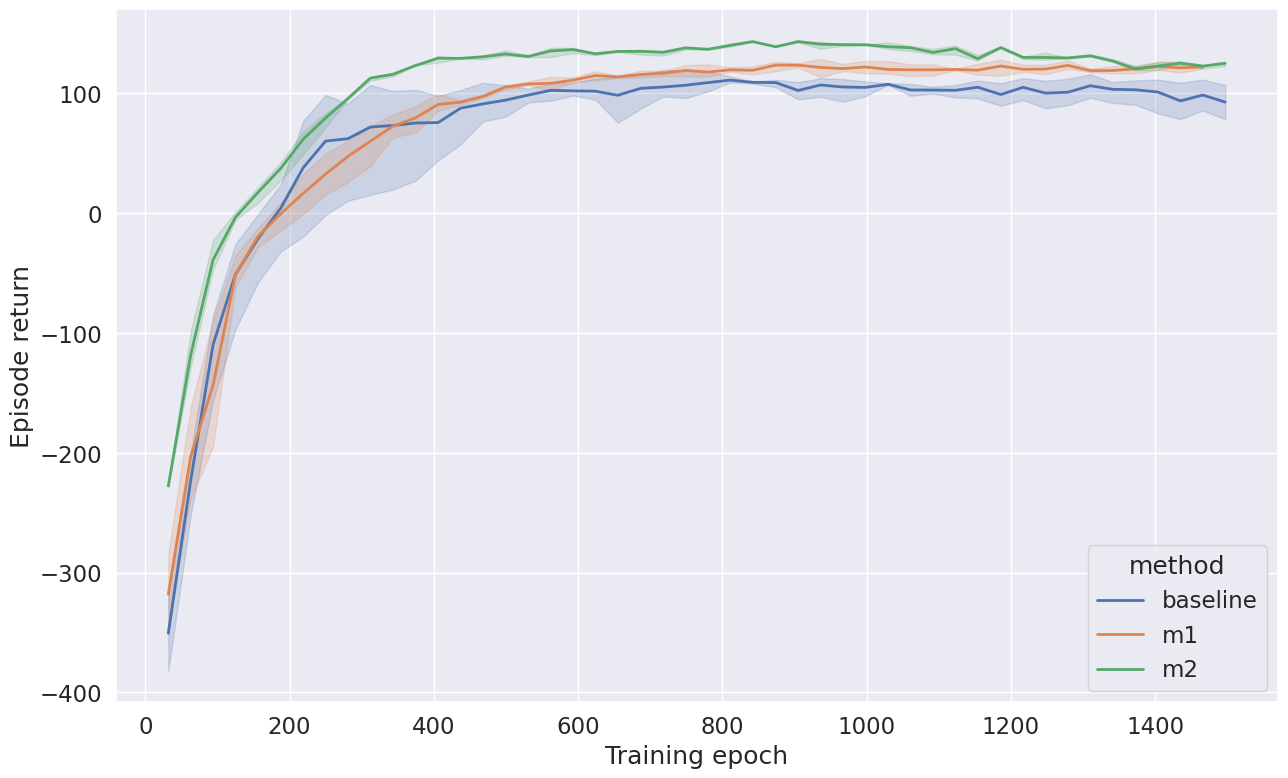

In [20]:
ax = sns.lineplot(x="epoch", y="return", hue="method", data=df5)
ax.figure.set_size_inches(15.0, 9.0)
sns.move_legend(ax, "lower right")
ax.set(xlabel='Training epoch', ylabel='Episode return')

plt.savefig("training.pdf", bbox_inches='tight')